# Exam 1 Solutions

## 1.1

In [1]:
from sklearn.datasets import fetch_openml 

lowbwt_bunch = fetch_openml('lowbwt', version=1, as_frame=True) 
lowbwt = lowbwt_bunch.data

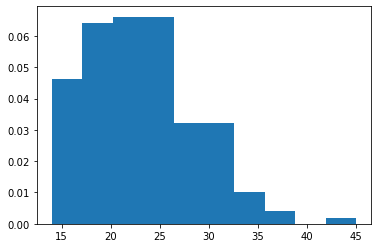

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.hist(lowbwt[lowbwt['UI']=='0']['AGE'], density=True)
plt.show()

## 1.2

In [3]:
import scipy.stats as stats
import numpy as np

samples = stats.norm.rvs(size=[10000,10], random_state=553)
sample_variances = np.var(samples,  axis=1, ddof=1) # Set ddof=1 for unbiased variance.
average_variance = np.mean(sample_variances)
print(average_variance)

0.9968209206269403


# 2 Density Estimation

## 2.1

In [4]:
import numpy as np
samples = np.array([
    -0.986884764999009, -0.851970773256441, -0.867796672206323, 1.16345615827449, -1.10159468310786, 
    -1.09025113310314, -1.00814879621656, 0.806680833662076, 1.06986054952863, 0.791445538608714, 
    -1.12102128751188, 1.04386395472623, -0.881116187067203, -0.941977270883302, 0.890590388346183
])

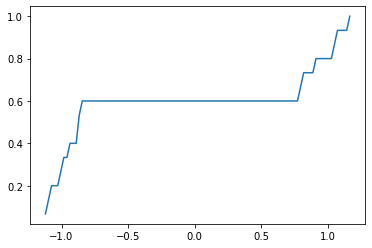

In [5]:
import numpy as np

def my_ecdf(x, dat):
    return [(1/len(dat)) * np.sum(dat <= x_i) for x_i in x]

x = np.linspace(min(samples), max(samples), 100)
plt.plot(x, my_ecdf(x, samples))
plt.show()

## 2.2

In [6]:
import numpy as np

# Load sample.
samples = np.array([
    -0.986884764999009, -0.851970773256441, -0.867796672206323, 1.16345615827449, -1.10159468310786, 
    -1.09025113310314, -1.00814879621656, 0.806680833662076, 1.06986054952863, 0.791445538608714, 
    -1.12102128751188, 1.04386395472623, -0.881116187067203, -0.941977270883302, 0.890590388346183
])

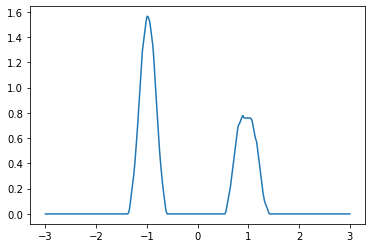

0.9999269874966021

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def kernel(x, dat, bw):
    t = (1 - abs((x - dat) / bw)) * (abs((x - dat) / bw) <= 1) # Adjust for support of kernel.
    return(t) 

def density(x, sample, bw):
    f = np.zeros(len(x))
    for dat in sample:        
        f = f + kernel(x, dat, bw)
    return(f / (len(sample)*bw))

x = np.linspace(-3,3, num = 500)
p = density(x, samples, 0.25)
plt.plot(x, p)
plt.show()

np.trapz(p, x)

# 3 Sampling

## 3.1

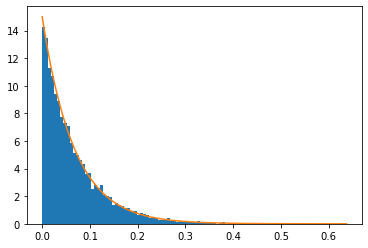

In [8]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

samples = stats.expon.rvs(scale=1/15, size=10000, random_state=553)
plt.hist(samples, bins=100, density=True)
x_axis = np.linspace(0, max(samples), 100)
plt.plot(x_axis, stats.expon.pdf(x_axis, scale=1/15))
plt.show()

# 3.2

Number of samples:	 2494


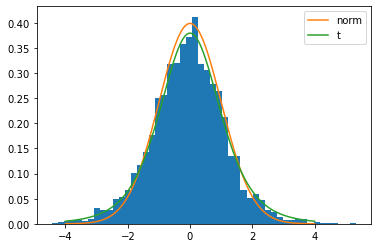

In [9]:
import scipy.stats as stats
import matplotlib.pyplot as plt

trials = 100000
df = 5
U = stats.uniform.rvs(loc=0, scale=1, size=trials, random_state=436)
Y = stats.norm.rvs(size=trials, random_state=636) # Generate from candidate distribution, not target distribution.

x = np.linspace(-4, 4, 1000)
M = max(stats.t.pdf(x, df=df) / stats.norm.pdf(x))
f = stats.t.pdf(Y, df=df)
g = stats.norm.pdf(Y)
ratio = f/g
samples = Y[U <= ratio/M]

print('Number of samples:\t', len(samples))
plt.hist(samples, density=True, bins=50)
plt.plot(x, stats.norm.pdf(x), label='norm')
plt.plot(x, stats.t.pdf(x, df=df), label='t')
plt.legend()
plt.show()

# 4 Regression

## 4.1

In [10]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston_bunch = load_boston()
X = boston_bunch.data
y = boston_bunch.target
labels = boston_bunch.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=553)

In [11]:
import numpy as np
import sklearn.linear_model as linear_model

alpha = 0.60
model = linear_model.Lasso(alpha=alpha)
model.fit(X_train, y_train)
print('{:<15} {}'.format('Alpha:', alpha))
print('{:<15} {}'.format('R-squared:', model.score(X_test, y_test)))
pos = np.where(model.coef_>0)
neg = np.where(model.coef_<0)
print('{:<15} {}'.format('Positive:', boston_bunch.feature_names[pos]))
print('{:<15} {}'.format('Negative:', boston_bunch.feature_names[neg]))

# Using scaling or normalization may give an alternative answer.

Alpha:          0.6
R-squared:      0.6545329640984333
Positive:       ['ZN' 'RM' 'AGE' 'RAD' 'B']
Negative:       ['CRIM' 'DIS' 'TAX' 'PTRATIO' 'LSTAT']


## 4.2

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.preprocessing as prepro

X_train_1, X_test_1 = X_train, X_test
reg_1 = LinearRegression().fit(X_train_1, y_train)

ind = np.where([a in ['ZN', 'RM', 'AGE', 'RAD', 'B'] for a in boston_bunch.feature_names])[0]
X_train_2, X_test_2 = X_train[:,ind], X_test[:,ind]
reg_2 = LinearRegression().fit(X_train_2, y_train)

poly = prepro.PolynomialFeatures(5)
X_train_3, X_test_3 = poly.fit_transform(X_train), poly.fit_transform(X_test)
reg_3 = LinearRegression().fit(X_train_3, y_train)

def model_comparison(model_list, features_list, target):
    k = 0
    for model in model_list:
        mse = mean_squared_error(target, model.predict(features_list[k]))
        print('MODEL', k+1)
        print('{:<15} {}'.format('MSE:', mse))
        k = k+1
    return

model_list = [reg_1, reg_2, reg_3]
features_list, target = [X_test_1, X_test_2, X_test_3], y_test # Use test set.
model_comparison(model_list, features_list, target)

MODEL 1
MSE:            29.07983300093228
MODEL 2
MSE:            42.42528769424969
MODEL 3
MSE:            30813.63149131693


# 5 Principal Component Analysis

## 5.1

In [13]:
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler

vertebra = pd.read_csv('https://www.openml.org/data/get_csv/1593720/phpZeLjnh')
predictors = vertebra.iloc[:,0:6]
target = vertebra.iloc[:,6]

scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)

In [16]:
from sklearn.decomposition import PCA

pca = sklearn.decomposition.PCA(n_components=6)
pca.fit(predictors_scaled)
Proj_predictors = pca.transform(predictors_scaled)

## 5.2

In [18]:
import numpy as np
from sklearn.decomposition import PCA

np.cumsum(pca.explained_variance_ratio_)

array([0.54096355, 0.74006064, 0.86690906, 0.94566373, 1.        ,
       1.        ])

### _Answer:_
According to the above cumulative sums of the explained variance ratios, 3 PC's should be retained to account for 80% of the variance.